In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/twitter_training.csv', header=None)

In [ ]:
print("Size of the dataset:", df.shape)

Size of the dataset: (74682, 4)


In [ ]:
df.columns = ['Tweet_ID', 'Entity','Sentiment','Tweet_Content']

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Check for any missing values
print("\nMissing values:")
print(df_cleaned.isnull().sum())

# Remove rows with missing values
df_cleaned = df.dropna()

# Tokenize the Tweet_Content column
df_cleaned['Tokenized_Text'] = df_cleaned['Tweet_Content'].apply(word_tokenize)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset after removing missing values and tokenization:", df_cleaned.shape)



Missing values:
Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Shape of the cleaned dataset after removing missing values and tokenization: (73996, 5)


<ipython-input-10-283f62d3be50>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tokenized_Text'] = df_cleaned['Tweet_Content'].apply(word_tokenize)


In [ ]:
# Check for any missing values
print("\nMissing values:")
print(df.isnull().sum())
# Remove rows with missing values
df_cleaned = df.dropna()
# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset after removing missing values:", df_cleaned.shape)


Missing values:
Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64
Shape of the cleaned dataset after removing missing values: (73996, 4)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming df_cleaned contains the cleaned dataset
X = df_cleaned['Tweet_Content']  # Features
y = df_cleaned['Sentiment']  # Target

# Convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize models
model1 = ExtraTreesClassifier(n_estimators=100, random_state=42)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an ensemble of models
ensemble = VotingClassifier(estimators=[('et', model1), ('rf', model2)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Predict on the testing set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.9212162162162162


Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.92      2696
    Negative       0.90      0.95      0.93      4380
     Neutral       0.91      0.92      0.91      3605
    Positive       0.92      0.92      0.92      4119

    accuracy                           0.92     14800
   macro avg       0.93      0.92      0.92     14800
weighted avg       0.92      0.92      0.92     14800



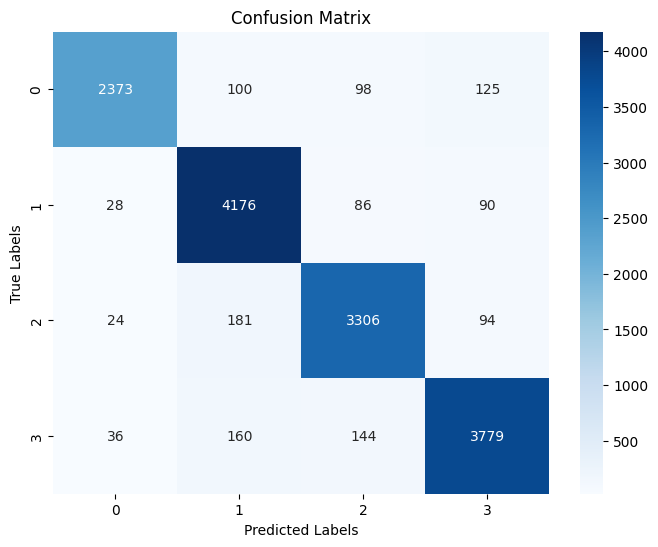

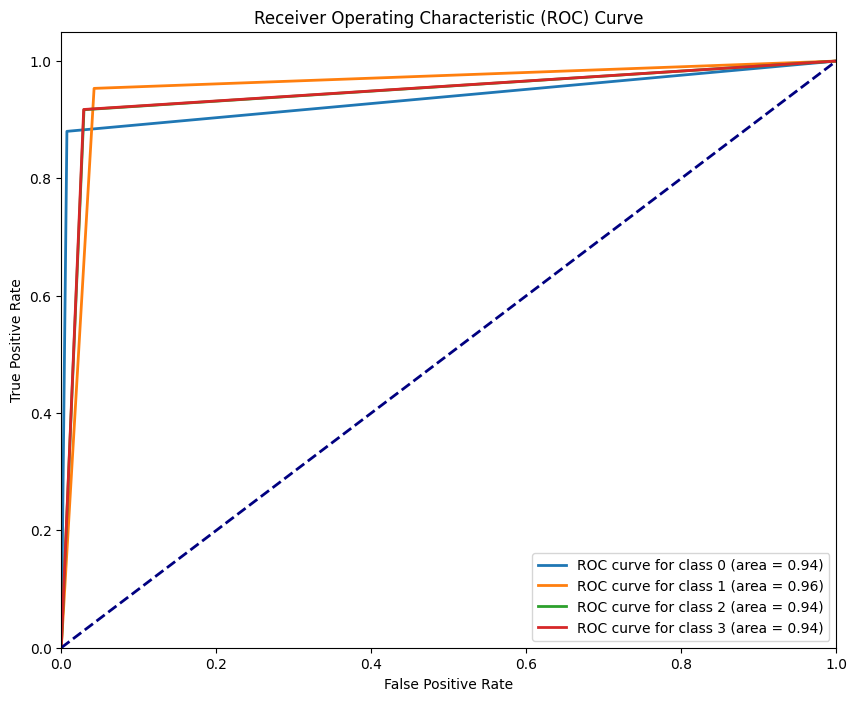

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.transform(y_pred)

# Convert multiclass labels to binary labels for each class
y_test_bin = np.zeros((y_test_numeric.size, len(label_encoder.classes_)))
y_test_bin[np.arange(y_test_numeric.size), y_test_numeric] = 1

y_pred_bin = np.zeros((y_test_numeric.size, len(label_encoder.classes_)))
y_pred_bin[np.arange(y_test_numeric.size), y_pred_numeric] = 1

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


